In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import *

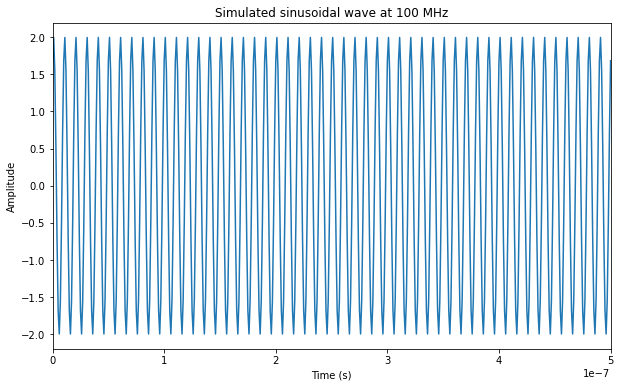

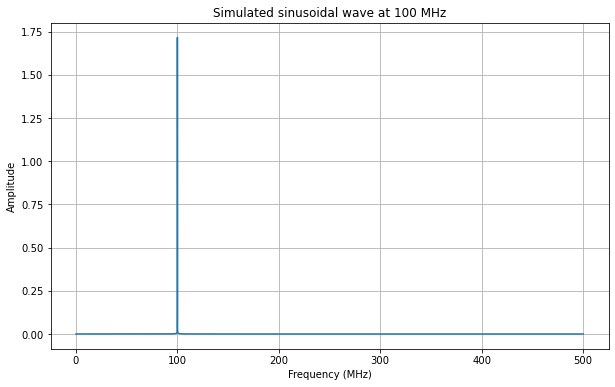

7629.336324033173

In [36]:
# Generate simulated single frequency data
nsamples = 131073
# nsamples = 10000
# ----------------
# Time
# ----------------
dt = 1.e-9
t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)')

# ----------------
# Ampllitude
# ----------------
freq = 100e6 # Hz
beatfreq = 0 # Hz
sample = pd.Series([np.sin(2*np.pi*freq*i*dt+1)+np.sin(2*np.pi*(freq+beatfreq)*i*dt+1) for i in range(nsamples)], name='%d MHz' %(int(freq*1e-6)))
df_sample = pd.DataFrame([t, sample]).T

header = list(df_sample.columns)


fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(t,sample,'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,0.5e-6)
plt.title('Simulated sinusoidal wave at %d MHz' %(int(freq*1e-6)))
plt.show()


yf = fft(df_sample[header[1]].values)
xf = fftfreq(nsamples, dt)[:nsamples//2]

fig2,ax2 = plt.subplots(figsize=(10,6))
ax2.plot(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
plt.title('Simulated sinusoidal wave at %d MHz' %(int(freq*1e-6)))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

xf[1]-xf[0]

['Time (s)', 'Signal']


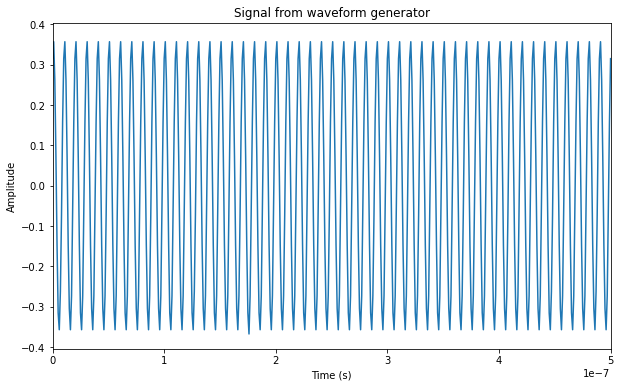

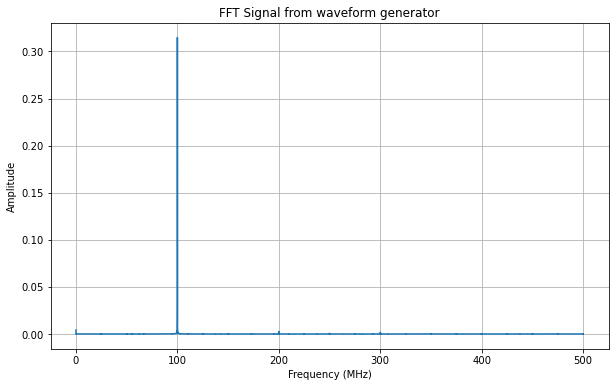

In [28]:
# Data from wavegen
sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230212/C3.csv').iloc[0:,1:2]
nsamples = len(sample)

# ----------------
# Time
# ----------------
dt = 1.e-9
t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T

df_sample = pd.DataFrame(t)
df_sample['Signal']=sample


header = list(df_sample.columns)
print(header)

fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_sample['Time (s)'],df_sample['Signal'],'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,0.5e-6)
plt.title('Signal from waveform generator')
plt.show()

yf = fft(df_sample['Signal'].values)
xf = fftfreq(nsamples, dt)[:nsamples//2]

fig2,ax2 = plt.subplots(figsize=(10,6))
ax2.plot(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1)
plt.grid()
plt.show()


['Time (s)', 'Signal']


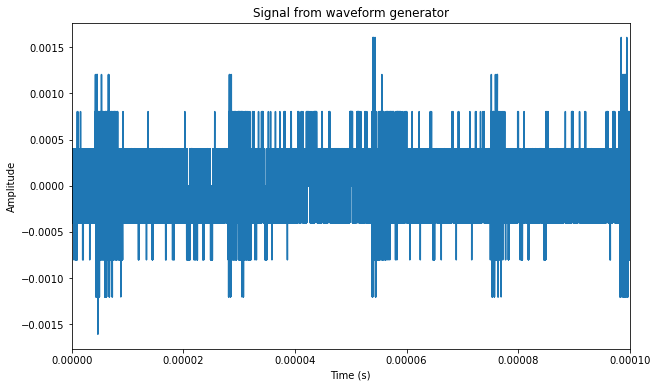

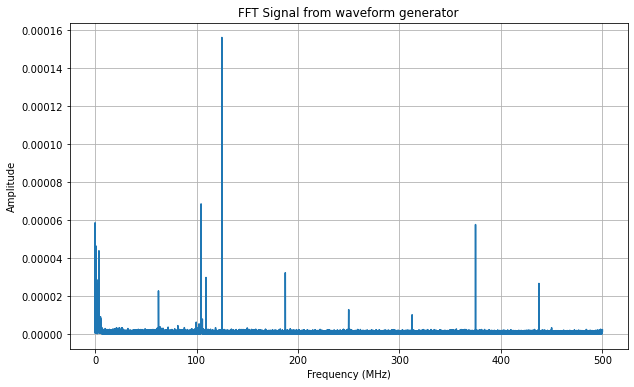

In [20]:
# Beat signal
sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230212/I0t500us.csv').iloc[0:,1:2]
nsamples = len(sample)

# ----------------
# Time
# ----------------
dt = 1.e-9
t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T

df_sample = pd.DataFrame(t)
df_sample['Signal']=sample


header = list(df_sample.columns)
print(header)

fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_sample['Time (s)'],df_sample['Signal'],'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,100e-6)
plt.title('Signal from waveform generator')
plt.show()

yf = fft(df_sample['Signal'].values)
xf = fftfreq(nsamples, dt)[:nsamples//2]

fig2,ax2 = plt.subplots(figsize=(10,6))
ax2.plot(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1e-9)
plt.grid()
plt.show()

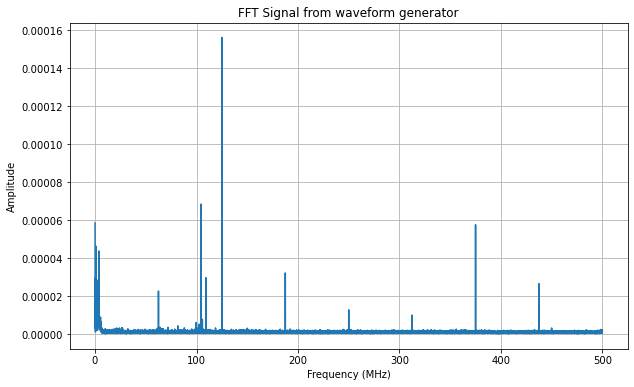

In [10]:
# Peakfinder

peaks, _ = find_peaks(2.0/nsamples * np.abs(yf[0:nsamples//2]))

peakfreq = pd.Series(xf[peaks]*1e-6,name='Frequency(MHz)')
peakamp = pd.Series(2.0/nsamples * np.abs(yf[0:nsamples//2])[peaks], name='Amplitude')

df_peak = pd.DataFrame(peakfreq)
df_peak['Amplitude']=peakamp

df_peak[df_peak.Amplitude > 0.00004]

fig3,ax3 = plt.subplots(figsize=(10,6))
# ax3.plot(df_peak['Frequency(MHz)'],df_peak['Amplitude'])
ax3.plot(peakfreq,peakamp)
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1)
plt.grid()
plt.show()

In [7]:
df_peak

Frequency(MHz)  Amplitude
0            0.015259   0.000059
1            0.030518   0.000022
2            0.068665   0.000020
3            0.099182   0.000007
4            0.129700   0.000029
...               ...        ...
21870      499.862671   0.000001
21871      499.885559   0.000001
21872      499.900818   0.000002
21873      499.923706   0.000002
21874      499.954224   0.000002

[21875 rows x 2 columns]

In [26]:
xf[:8]-xf[1:9]

array([-7629.33632403, -7629.33632403, -7629.33632403, -7629.33632403,
       -7629.33632403, -7629.33632403, -7629.33632403, -7629.33632403])

In [8]:
import plotly.express as px
fig = px.line(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
fig.show()